![image](https://github.com/kbigdata005/ml/assets/139095086/bf605d7d-2b6d-4250-81b4-ab95dde835a2)

#### tf.keras.layers.Conv2D
* tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

* tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)

* tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)

* tf.keras.layers.Flatten(
    data_format=None, **kwargs
)

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1) / 255
X_test = X_test.reshape(10000, 28, 28, 1) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# CNN 구조
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1: val_loss improved from inf to 0.04404, saving model to ./cnn_model/01-0.0440.hdf5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.04404 to 0.03424, saving model to ./cnn_model/02-0.0342.hdf5

Epoch 3: val_loss improved from 0.03424 to 0.03164, saving model to ./cnn_model/03-0.0316.hdf5

Epoch 4: val_loss improved from 0.03164 to 0.02554, saving model to ./cnn_model/04-0.0255.hdf5

Epoch 5: val_loss did not improve from 0.02554

Epoch 6: val_loss did not improve from 0.02554

Epoch 7: val_loss did not improve from 0.02554

Epoch 8: val_loss did not improve from 0.02554

Epoch 9: val_loss did not improve from 0.02554

Epoch 10: val_loss did not improve from 0.02554

Epoch 11: val_loss did not improve from 0.02554

Epoch 12: val_loss did not improve from 0.02554

Epoch 13: val_loss did not improve from 0.02554

Epoch 14: val_loss did not improve from 0.02554
313/313 [==============================] - 3s 8ms/step - loss: 0.0323 - accuracy: 0.9920

 Test Accuracy: 0.9920


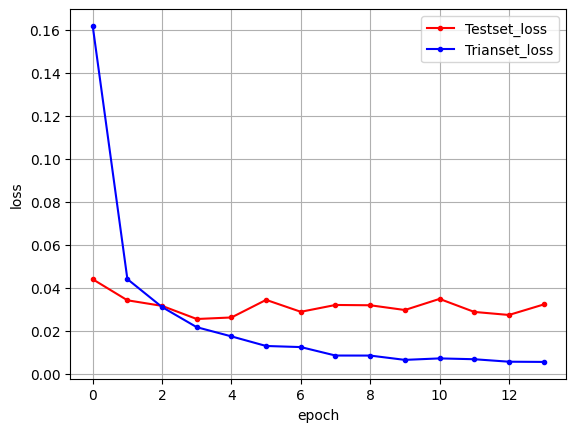

In [16]:
MODEL_DIR = './cnn_model'
if not os.path.exists(MODEL_DIR):
	os.mkdir(MODEL_DIR)

modelpath = './cnn_model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trianset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()